In [1]:
import sys

# Add Robyn to path
# sys.path.append("/Users/yijuilee/robynpy_release_reviews/Robyn/python/src")

In [2]:
# Test Pareto Optimizer

from robyn.modeling.pareto.pareto_optimizer import ParetoOptimizer
from robyn.tutorials.utils.data_mapper import (
    import_output_models,
    import_input_collect,
    load_data_from_json,
)

2024-11-21 01:47:21,632 - robyn - INFO - Logging is set up to console only.
/Users/yijuilee/robynpy_release_reviews/robynvenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load data from JSON
inputCollect = load_data_from_json(
    "/Users/funny/Documents/git/Robyn/python/src/robyn/tutorials/resources/Pareto_InputCollect.json"
)
outputModel = load_data_from_json(
    "/Users/funny/Documents/git/Robyn/python/src/robyn/tutorials/resources/Pareto_OutputModels.json"
)
input_collect = import_input_collect(inputCollect)
output_models = import_output_models(outputModel)

Adjusted window_start to the closest date in the data: 2016-01-04 00:00:00
Adjusted window_end to the closest date in the data: 2018-12-31 00:00:00
Raw hyperparameters data: {'facebook_S_alphas': [0.5, 3], 'facebook_S_gammas': [0.3, 1], 'facebook_S_thetas': [0, 0.3], 'print_S_alphas': [0.5, 3], 'print_S_gammas': [0.3, 1], 'print_S_thetas': [0.1, 0.4], 'tv_S_alphas': [0.5, 3], 'tv_S_gammas': [0.3, 1], 'tv_S_thetas': [0.3, 0.8], 'search_S_alphas': [0.5, 3], 'search_S_gammas': [0.3, 1], 'search_S_thetas': [0, 0.3], 'ooh_S_alphas': [0.5, 3], 'ooh_S_gammas': [0.3, 1], 'ooh_S_thetas': [0.1, 0.4], 'newsletter_alphas': [0.5, 3], 'newsletter_gammas': [0.3, 1], 'newsletter_thetas': [0.1, 0.4], 'train_size': [0.5, 0.8]}
Debug: R output data keys: ['trial1', 'trial2', 'trial3', 'trial4', 'trial5']
Data for trial1: Keys = ['resultCollect', 'hyperBoundNG', 'hyperBoundFixed']
Debug: resultCollect keys for trial1: ['resultHypParam', 'xDecompAgg', 'liftCalibration', 'decompSpendDist', 'iter', 'elapsed.

In [4]:
mmm_data = input_collect["mmm_data"]
# display(mmm_data.data.head())
# Display Model Outputs

output_models = output_models
# display((model_outputs.trials[0].result_hyp_param))

hyperparameters = input_collect["hyperparameters"]
# display(hyperparameters)

featurized_mmm_data = input_collect["featurized_mmm_data"]

holidays_data = input_collect["holidays_data"]

In [5]:
# Add after model training
print("Model Output Summary:")
print(f"Number of trials: {len(output_models.trials)}")
print(
    f"Average models per trial: {len(output_models.all_result_hyp_param) / len(output_models.trials)}"
)
print(
    f"Total unique models: {len(output_models.all_result_hyp_param['sol_id'].unique())}"
)

print("\nMetrics Distribution:")
metrics_df = output_models.all_result_hyp_param[["nrmse", "decomp.rssd", "mape"]]
print(metrics_df.describe())

# Additional validation to debug model output
print("\nColumns in result_hyp_param:")
print(output_models.all_result_hyp_param.columns.tolist())

print("\nSample rows of metrics:")
print(
    output_models.all_result_hyp_param[
        ["sol_id", "nrmse", "decomp.rssd", "mape"]
    ].head()
)

# Show shape of result dataframes
print("\nDataFrame Shapes:")
print(f"result_hyp_param: {output_models.all_result_hyp_param.shape}")
print(f"x_decomp_agg: {output_models.all_x_decomp_agg.shape}")
print(f"decomp_spend_dist: {output_models.all_decomp_spend_dist.shape}")

Model Output Summary:
Number of trials: 5
Average models per trial: 2007.0
Total unique models: 10035

Metrics Distribution:
              nrmse   decomp.rssd          mape
count  10035.000000  10035.000000  10035.000000
mean       0.285779      0.628863    176.847461
std        0.067437      0.083541    167.500223
min        0.085069      0.369959      0.812119
25%        0.242605      0.565598     87.377313
50%        0.264548      0.631424    115.026803
75%        0.301364      0.696620    182.792278
max        0.521505      0.873183   1129.896150

Columns in result_hyp_param:
['facebook_S_alphas', 'facebook_S_gammas', 'facebook_S_thetas', 'newsletter_alphas', 'newsletter_gammas', 'newsletter_thetas', 'ooh_S_alphas', 'ooh_S_gammas', 'ooh_S_thetas', 'print_S_alphas', 'print_S_gammas', 'print_S_thetas', 'search_S_alphas', 'search_S_gammas', 'search_S_thetas', 'tv_S_alphas', 'tv_S_gammas', 'tv_S_thetas', 'train_size', 'rsq_train', 'rsq_val', 'rsq_test', 'nrmse_train', 'nrmse_val', 'nrm

In [6]:
# 3. Create ParetoOptimizer instance
pareto_optimizer = ParetoOptimizer(
    mmm_data, output_models, hyperparameters, featurized_mmm_data, holidays_data
)

In [7]:
# 4. Run optimize function
pareto_result = pareto_optimizer.optimize(pareto_fronts="auto", min_candidates=100)

2024-11-21 01:47:26 [INFO] Starting Pareto optimization
2024-11-21 01:47:26 [INFO] Starting model data aggregation
2024-11-21 01:47:26 [INFO] Computing Pareto fronts
2024-11-21 01:47:26 [INFO] Pareto front computation completed
2024-11-21 01:47:26 [INFO] Preparing Pareto data
2024-11-21 01:47:26 [INFO] Number of Pareto-optimal solutions found: 637
2024-11-21 01:47:26 [INFO] Selected 10 Pareto-fronts containing 102 candidates
2024-11-21 01:47:26 [INFO] Filtering data for selected Pareto fronts...
2024-11-21 01:47:26 [INFO] Calculating response curves for 510 models' media variables...
Processing rows: 100%|██████████| 510/510 [00:03<00:00, 128.06it/s] 
2024-11-21 01:47:32 [INFO] Successfully processed 510 response curves
2024-11-21 01:47:32 [INFO] Computing final metrics...
2024-11-21 01:47:32 [INFO] Calculating ROI and CPA metrics...
2024-11-21 01:47:32 [INFO] Starting plot data generation...
2024-11-21 01:47:32 [INFO] Processing Pareto front 1
2024-11-21 01:47:32 [INFO] Pareto-Front: 

In [8]:
# 5. Check results
print("Pareto Optimization Results:")
print(
    f"Number of Pareto fronts: {len(pareto_result.pareto_solutions)} - {pareto_result.pareto_solutions}"
)
print(
    f"MediaVecCollect: {pareto_result.media_vec_collect.shape, pareto_result.media_vec_collect}"
)
print("\Hyper parameter solutions:")
print(pareto_result.result_hyp_param)

print("\nAggregated decomposition results:")
print(pareto_result.x_decomp_agg)
print("\result Calibration:")
print(pareto_result.result_calibration)
print("\nx Decomp Vec Collect:")
print(pareto_result.x_decomp_vec_collect.shape, pareto_result.x_decomp_vec_collect)
print("\nCarryover percentage all:")
print(pareto_result.df_caov_pct_all.shape, pareto_result.df_caov_pct_all)
print("\Plot Data Collected")
# print("NUMBER OF PLOTS Data collected for:", len(pareto_result.plot_data_collect["2_4_8"]))
# print("Plot data for solid 3_206_6", pareto_result.plot_data_collect["2_4_8"])

# 6. Validate logic
assert pareto_result.pareto_fronts == "auto" or isinstance(
    pareto_result.pareto_fronts, int
), "Invalid pareto_fronts value"
assert not pareto_result.result_hyp_param.empty, "Empty result_hyp_param DataFrame"
assert not pareto_result.x_decomp_agg.empty, "Empty x_decomp_agg DataFrame"

print("\nAll assertions passed. The optimize function is working as expected.")

Pareto Optimization Results:
Number of Pareto fronts: 102 - ['3_109_9', '3_127_7', '3_144_4', '3_204_5', '1_166_9', '4_105_5', '3_95_4', '2_100_6', '3_115_4', '5_222_1', '3_214_9', '3_214_7', '3_219_3', '3_102_1', '3_91_1', '3_78_9', '3_66_5', '2_220_1', '4_129_2', '1_160_3', '3_189_7', '2_221_6', '3_77_7', '3_196_4', '2_215_9', '3_168_7', '3_194_5', '3_74_4', '3_171_1', '3_108_7', '3_131_1', '5_220_8', '3_85_4', '2_97_3', '1_217_2', '2_198_3', '5_221_5', '5_109_5', '3_162_1', '3_82_3', '2_208_9', '3_216_9', '2_87_4', '5_221_9', '3_138_7', '3_78_7', '3_123_1', '3_158_7', '2_218_4', '2_85_3', '2_178_6', '1_65_6', '3_221_6', '3_218_3', '2_204_9', '2_144_8', '4_108_8', '2_101_9', '2_197_8', '3_197_5', '3_174_4', '3_197_8', '5_117_1', '5_80_5', '3_204_9', '2_170_8', '2_221_2', '2_218_3', '3_107_7', '3_75_4', '1_150_3', '3_147_7', '5_196_6', '2_198_9', '2_218_2', '2_201_6', '3_133_6', '5_211_9', '5_193_3', '1_208_4', '2_207_8', '3_71_1', '3_201_2', '2_95_3', '1_156_9', '3_91_7', '2_214_8', 

In [9]:
print(pareto_result.x_decomp_agg[pareto_result.x_decomp_agg["sol_id"] == "5_221_9"])

                        rn          coef    xDecompAgg  xDecompPerc  \
120192         (Intercept)  1.644321e+06  2.581584e+08     0.918810   
120193               trend  4.459851e-02  1.247974e+07     0.044417   
120194              season  1.127069e-02  4.125552e+03     0.000015   
120195             holiday  6.814444e-03  4.744938e+04     0.000169   
120196  competitor_sales_B  3.769144e-03  3.283818e+06     0.011687   
120197              events  0.000000e+00  0.000000e+00     0.000000   
120198                tv_S  2.559599e+04  9.837413e+05     0.003501   
120199               ooh_S  1.836652e+04  8.468751e+05     0.003014   
120200             print_S  1.078328e+04  1.883380e+05     0.000670   
120201          facebook_S  3.183148e+04  6.904533e+05     0.002457   
120202            search_S  5.238386e+04  1.272921e+06     0.004530   
120203          newsletter  4.851615e+04  3.014532e+06     0.010729   

        xDecompMeanNon0  xDecompMeanNon0Perc  xDecompAggRF  xDecompPercRF  \

# Clustering

In [10]:
from robyn.modeling.clustering.clustering_config import ClusteringConfig, ClusterBy
from robyn.modeling.clustering.cluster_builder import ClusterBuilder
from robyn.data.entities.enums import DependentVarType
import plotly.io as pio

pio.renderers.default = "iframe"

cluster_configs = ClusteringConfig(
    dep_var_type=DependentVarType(mmm_data.mmmdata_spec.dep_var_type),
    cluster_by=ClusterBy.HYPERPARAMETERS,
    max_clusters=10,
    min_clusters=3,
    weights=[1.0, 1.0, 1.0],
)

cluster_builder = ClusterBuilder(pareto_result=pareto_result)

2024-11-21 01:47:45,003 - robyn.modeling.clustering.cluster_builder - INFO - Initializing ClusterBuilder
2024-11-21 01:47:45,003 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-11-21 01:47:45,003 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-11-21 01:47:45,004 - robyn.modeling.clustering.cluster_builder - INFO - ClusterBuilder initialization complete


In [11]:
cluster_results = cluster_builder.cluster_models(cluster_configs)

2024-11-21 01:47:45,007 - robyn.modeling.clustering.cluster_builder - INFO - Starting model clustering process
2024-11-21 01:47:45,013 - robyn.modeling.clustering.cluster_builder - INFO - Clustering by: ClusterBy.HYPERPARAMETERS
2024-11-21 01:47:45,014 - robyn.modeling.clustering.cluster_builder - INFO - Starting optimal cluster selection
2024-11-21 01:47:45,015 - robyn.modeling.clustering.cluster_builder - INFO - Ignored features: sol_id, nrmse_train, nrmse, nrmse_test, nrmse_val, pareto, mape, decomp.rssd
2024-11-21 01:47:45,015 - robyn.modeling.clustering.cluster_builder - INFO - Starting WSS calculation for 30 clusters
2024-11-21 01:47:45,360 - robyn.modeling.clustering.cluster_builder - INFO - Selected optimal number of clusters: 5
2024-11-21 01:47:45,361 - robyn.modeling.clustering.cluster_builder - INFO - Selected 5 clusters
2024-11-21 01:47:45,362 - robyn.modeling.clustering.cluster_builder - INFO - Ignored features: sol_id, nrmse_train, nrmse, nrmse_test, nrmse_val, pareto, ma

9788    5_196_6
4863     3_95_4
3988    2_221_2
4704     3_77_7
5785    3_197_8
Name: sol_id, dtype: object


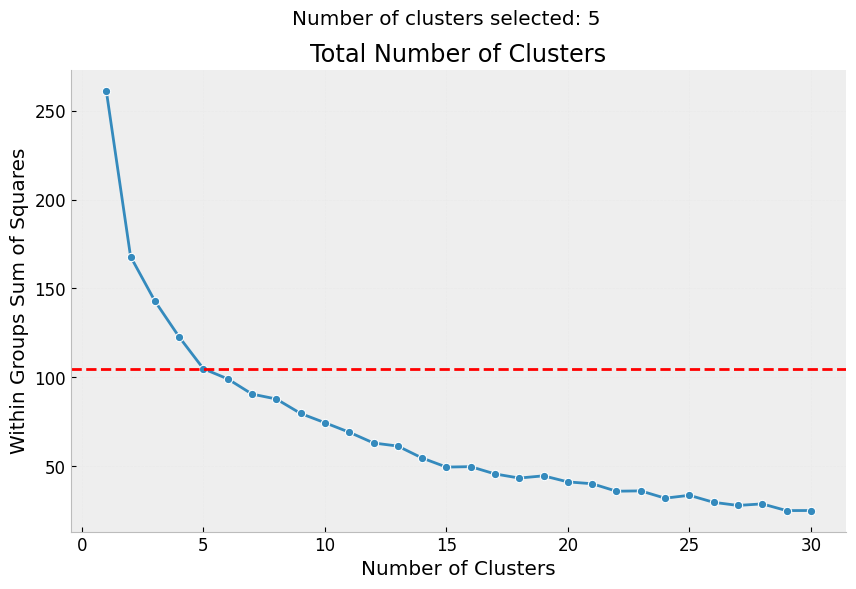

In [12]:
# Cluster result Validations (graphs)
print(cluster_results.top_solutions["sol_id"])
cluster_results.wss

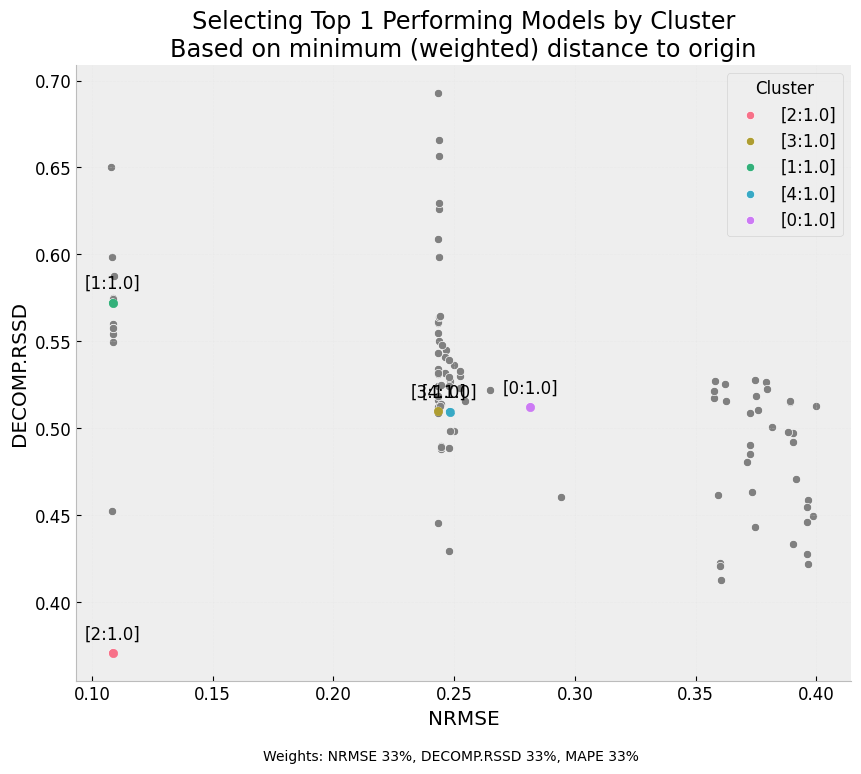

In [13]:
cluster_results.plots.top_solutions_errors_plot

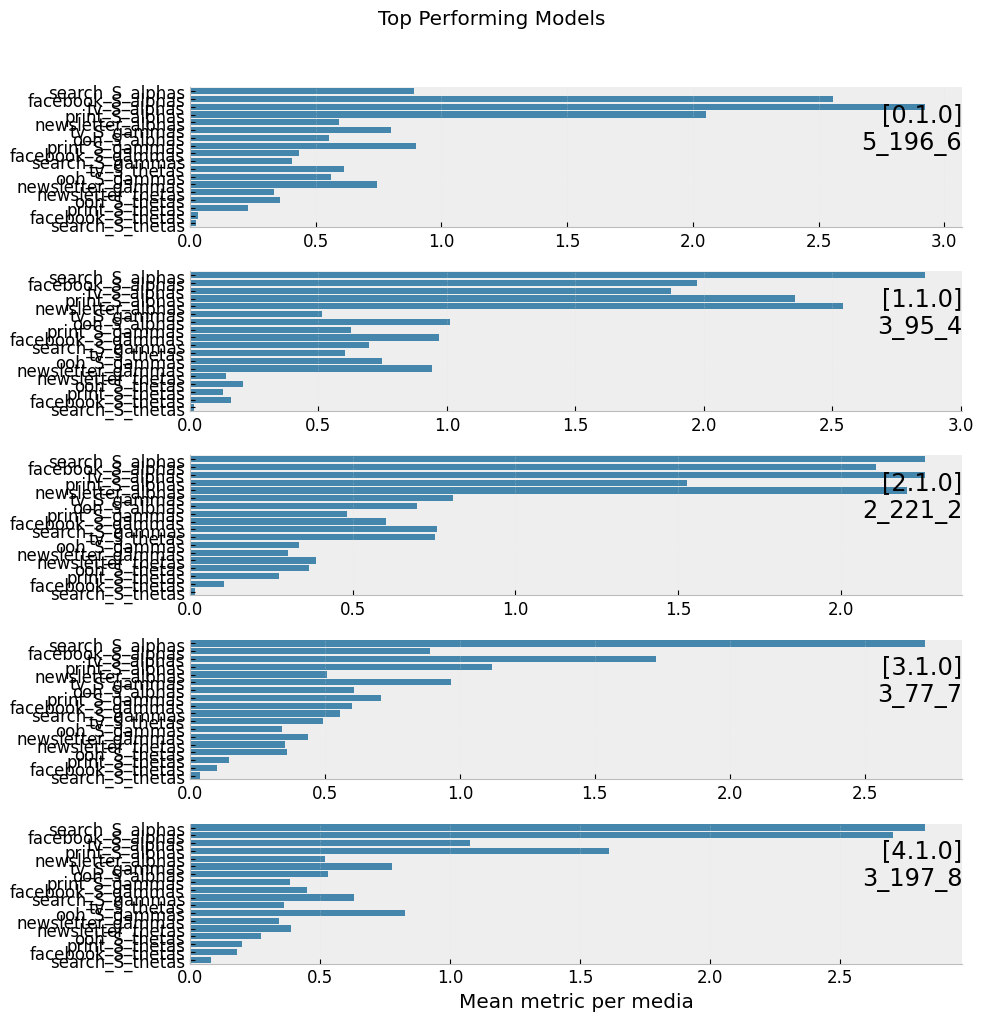

In [14]:
cluster_results.plots.top_solutions_rois_plot

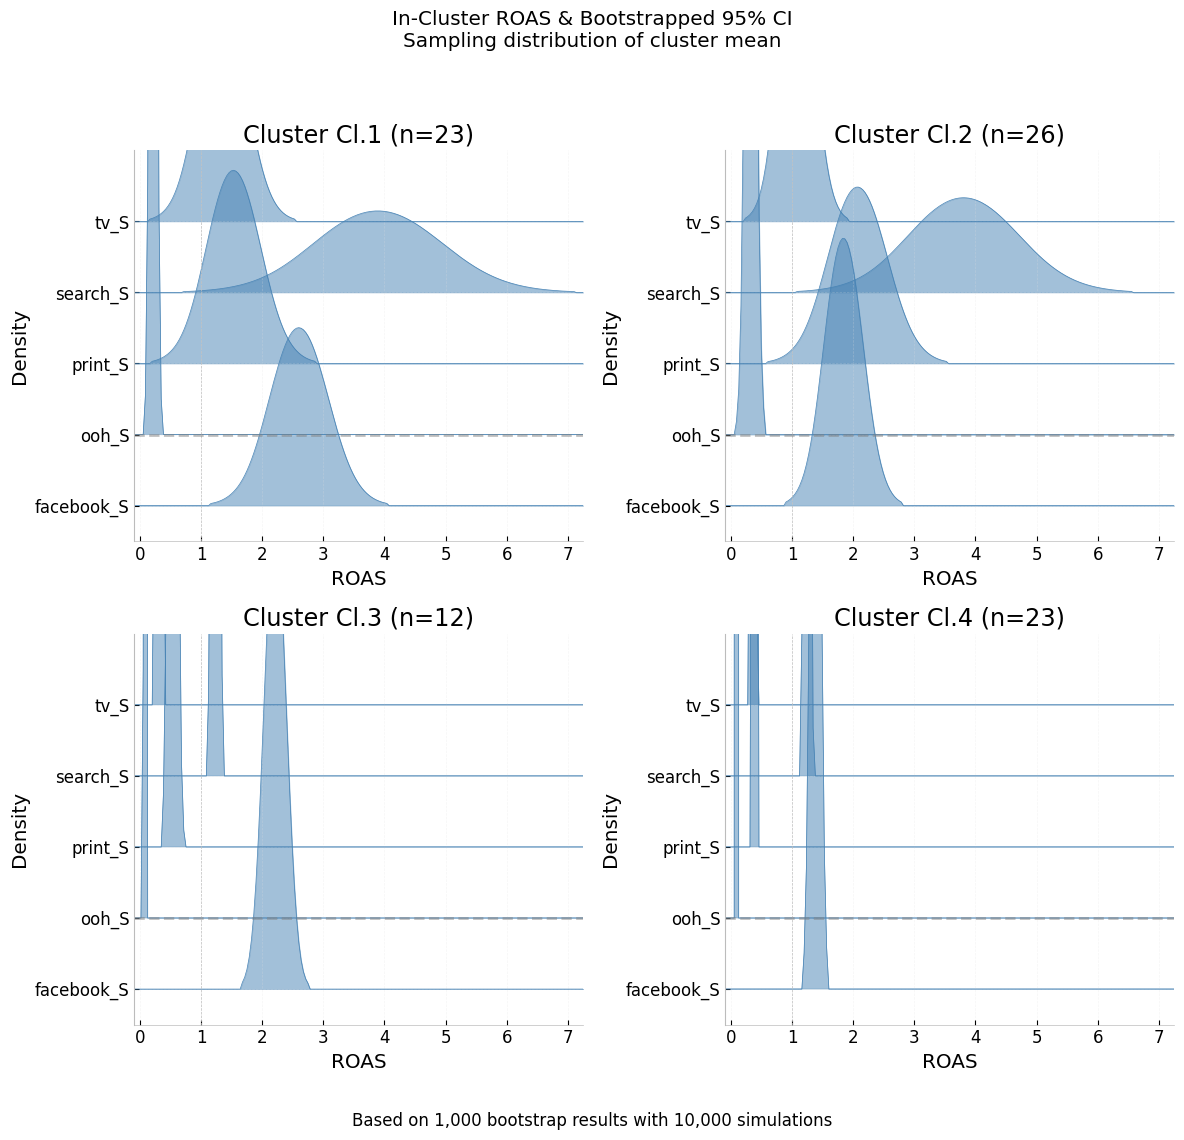

In [15]:
cluster_results.cluster_ci.clusters_confidence_interval_plot

### Process Pareto Clustered Results for Allocator

In [16]:
from robyn.modeling.pareto.pareto_utils import ParetoUtils

utils = ParetoUtils()
filtered_pareto_results = utils.process_pareto_clustered_results(
    pareto_result,
    clustered_result=cluster_results,
    ran_cluster=True,
    ran_calibration=False,
)

# One Pager Results

2024-11-21 01:47:47,940 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-11-21 01:47:47,940 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-11-21 01:47:47,940 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-11-21 01:47:47,941 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-11-21 01:47:47,941 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-11-21 01:47:47,941 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-11-21 01:47:47,941 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-11-21 01:47:47,942 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-11-21 01:47:48,112 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualiz

[<Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>]

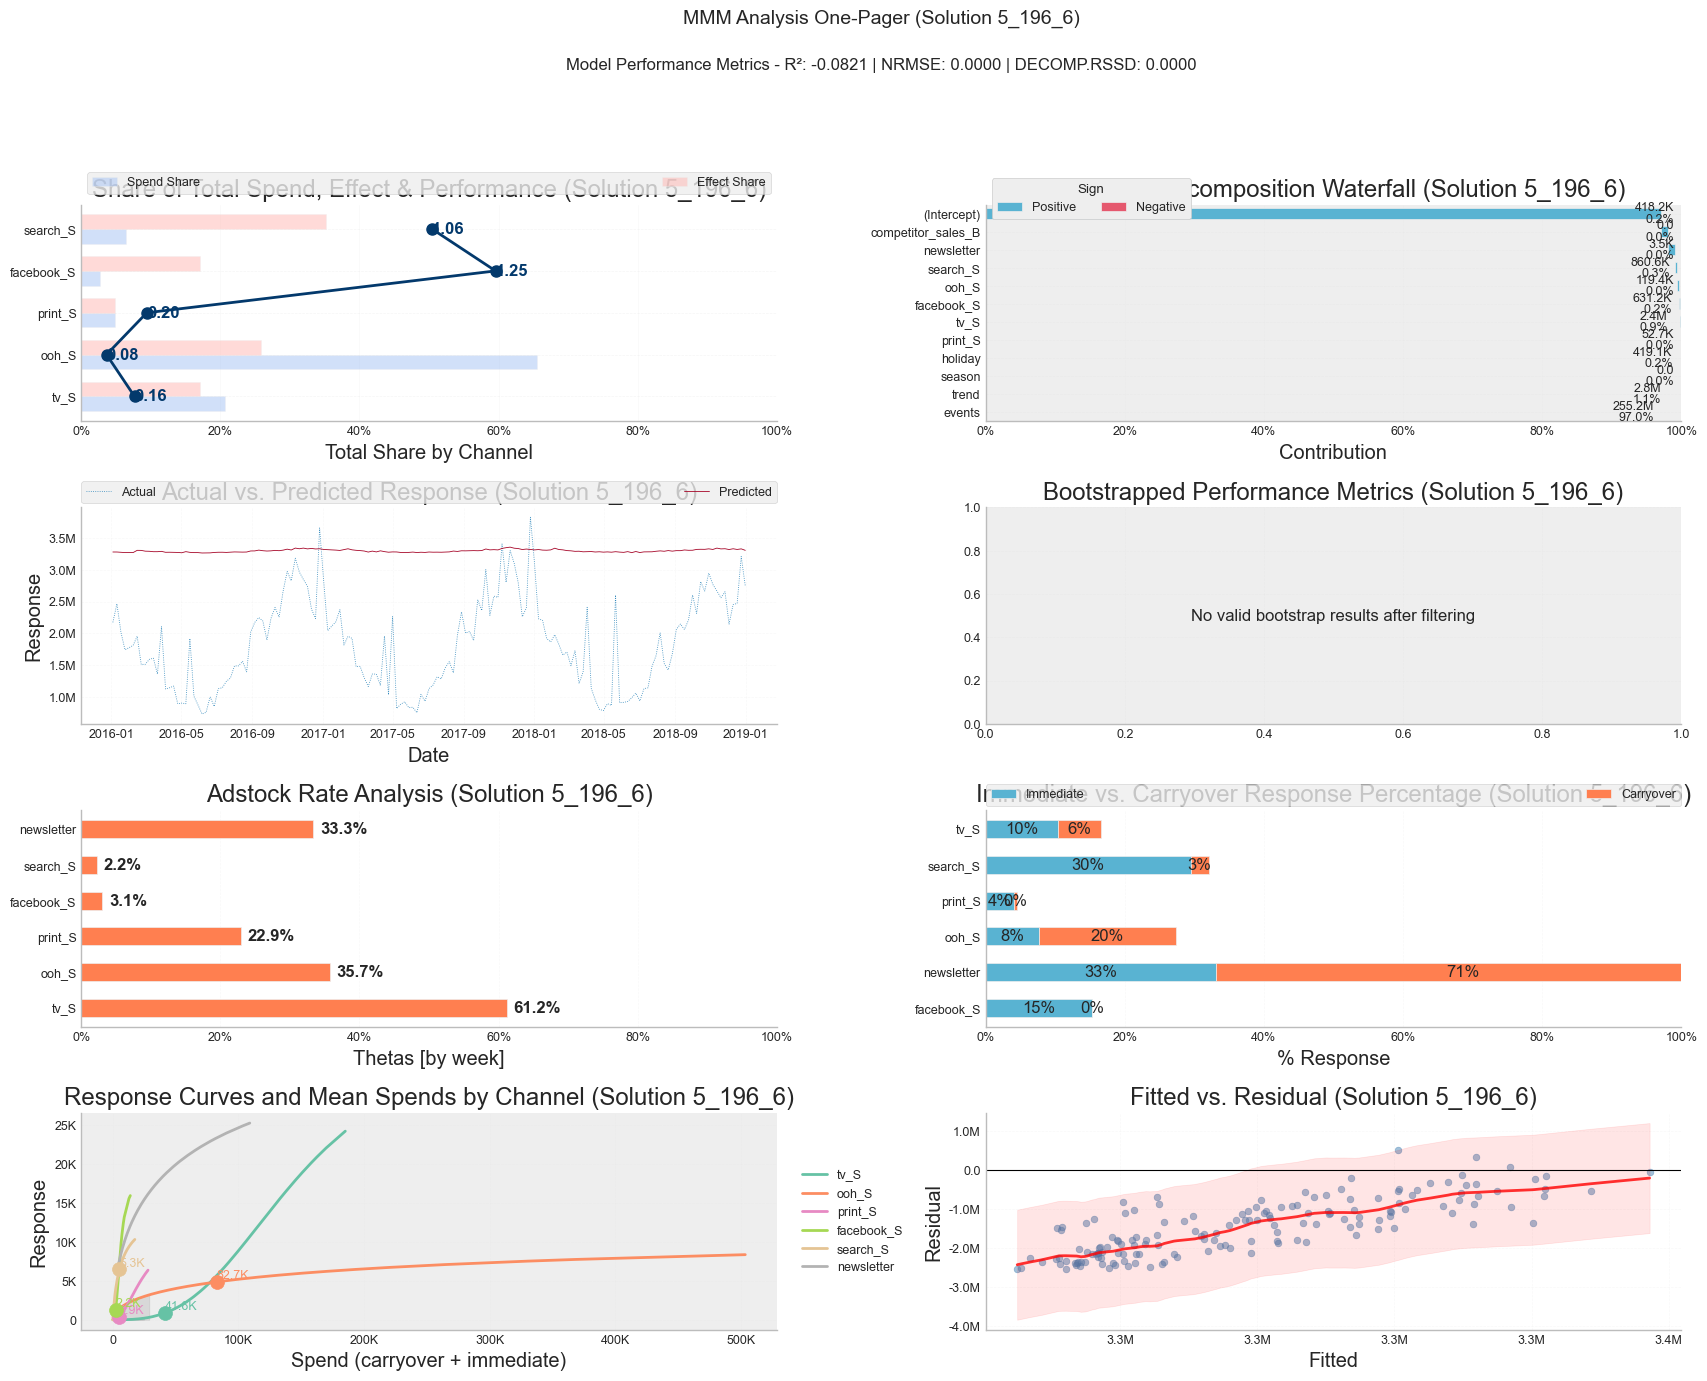

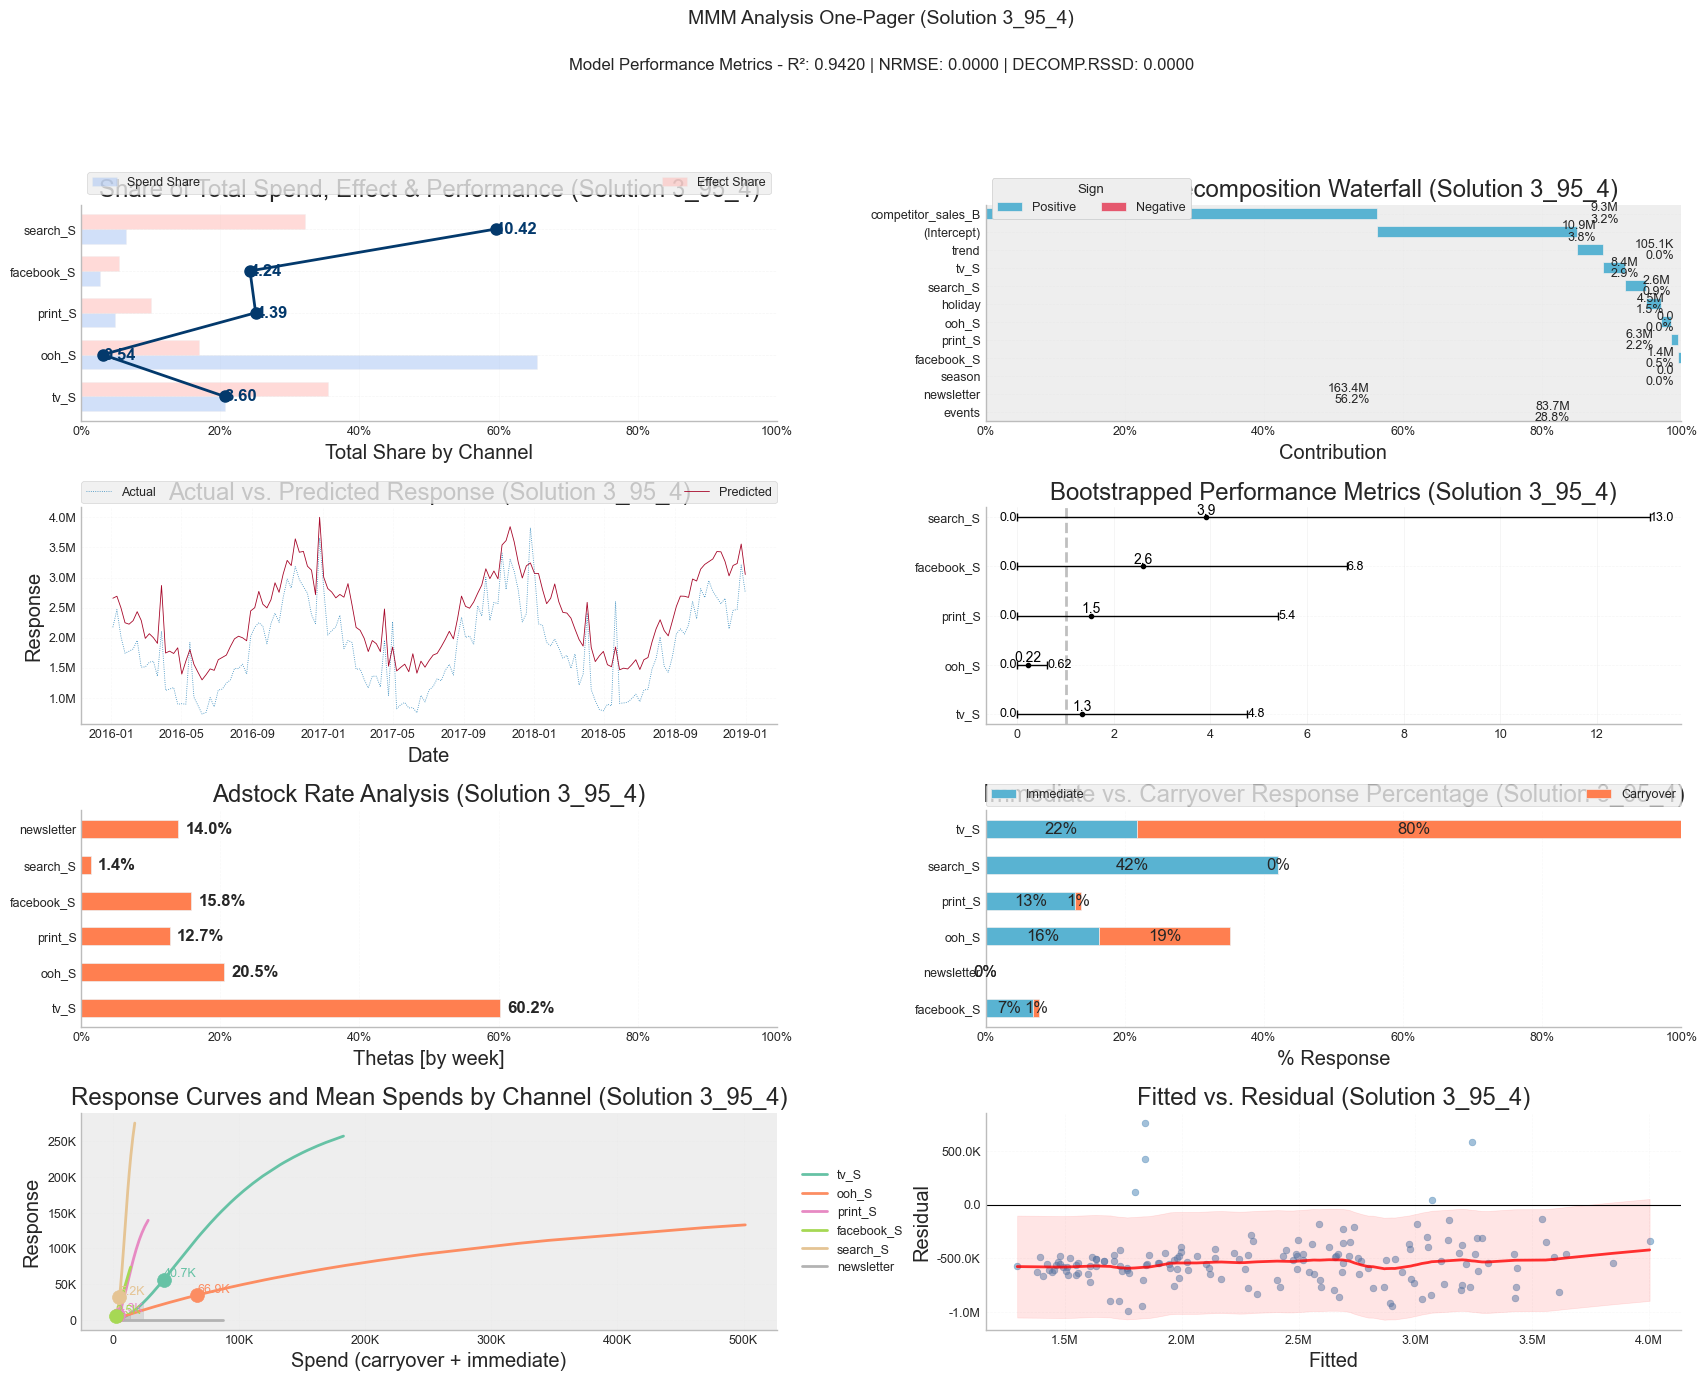

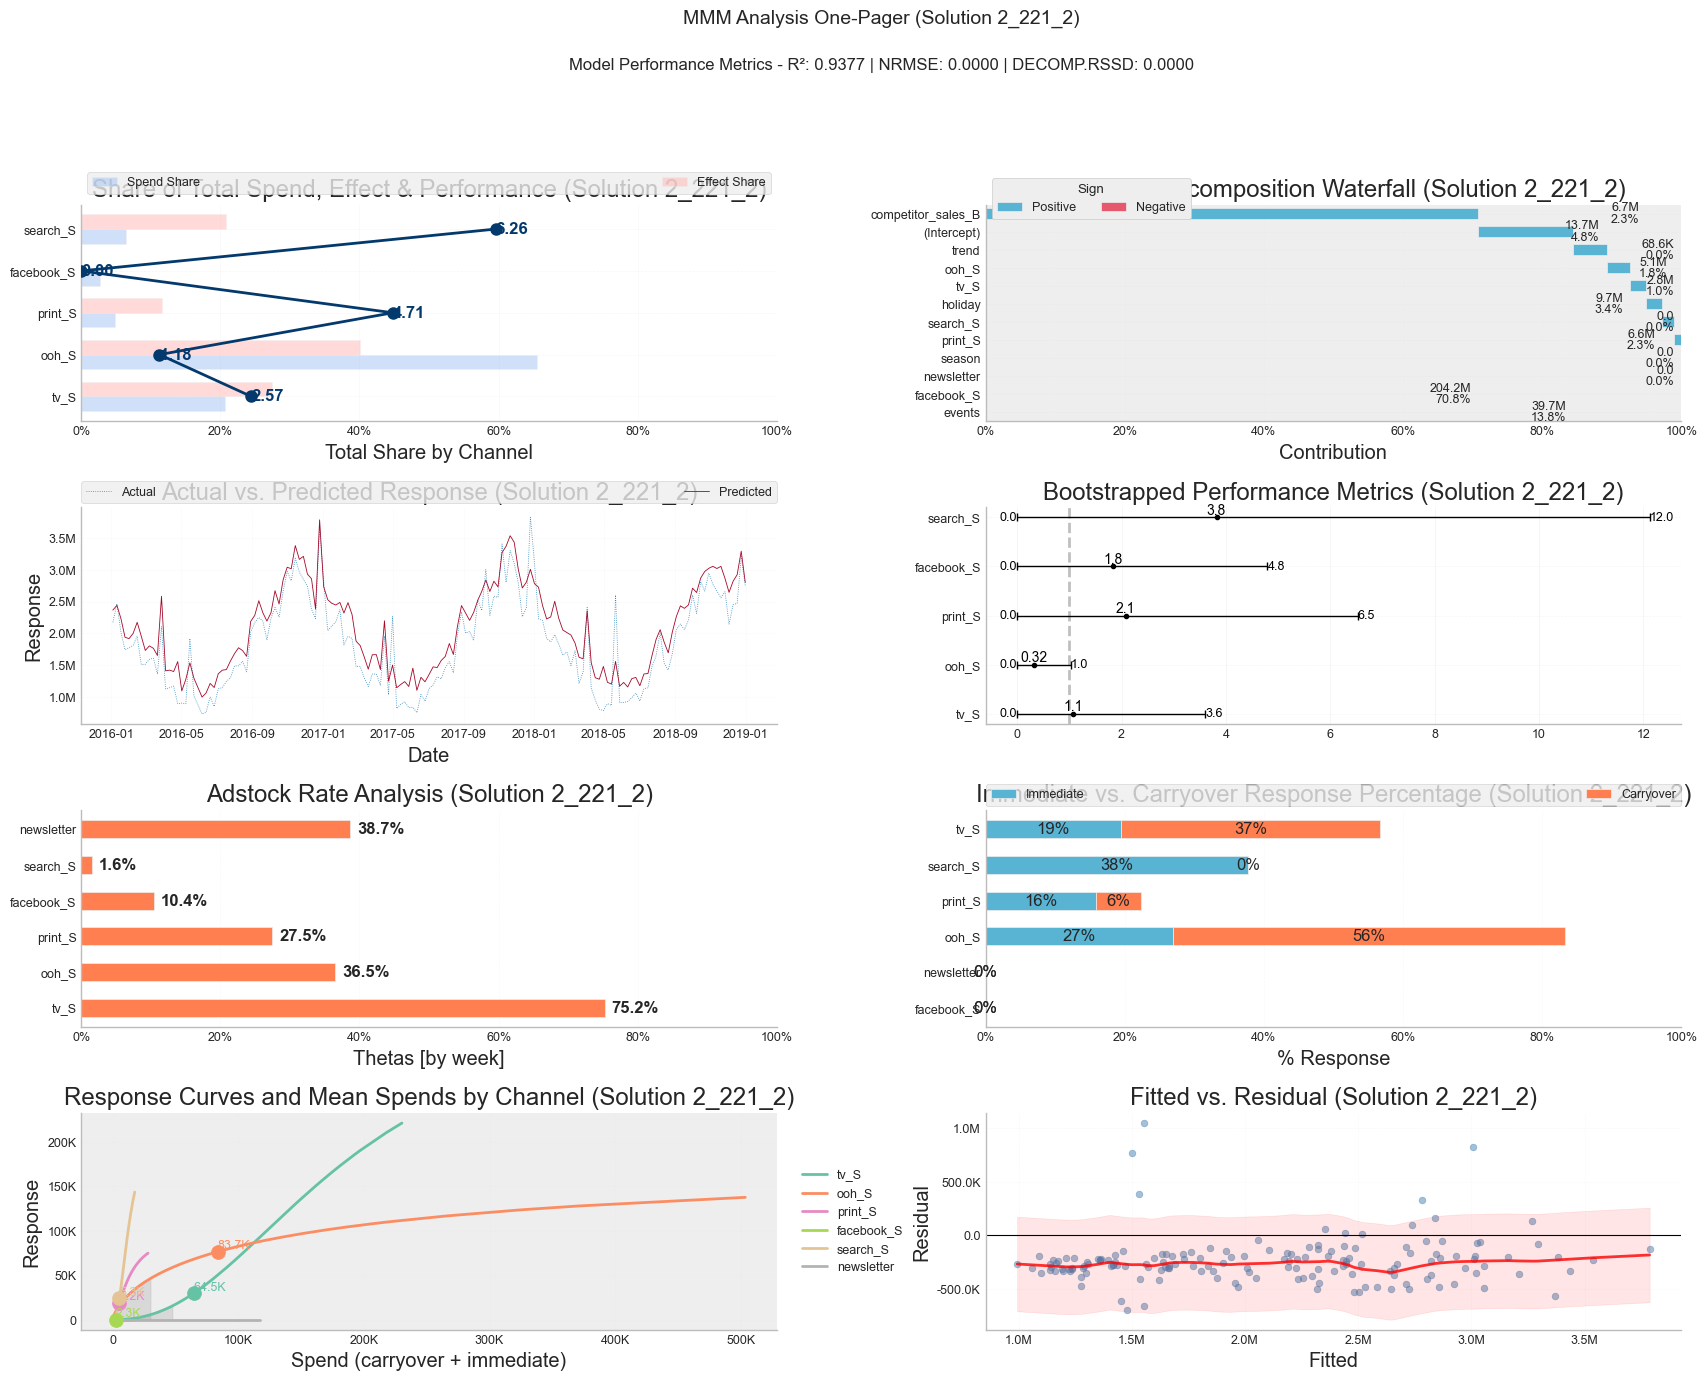

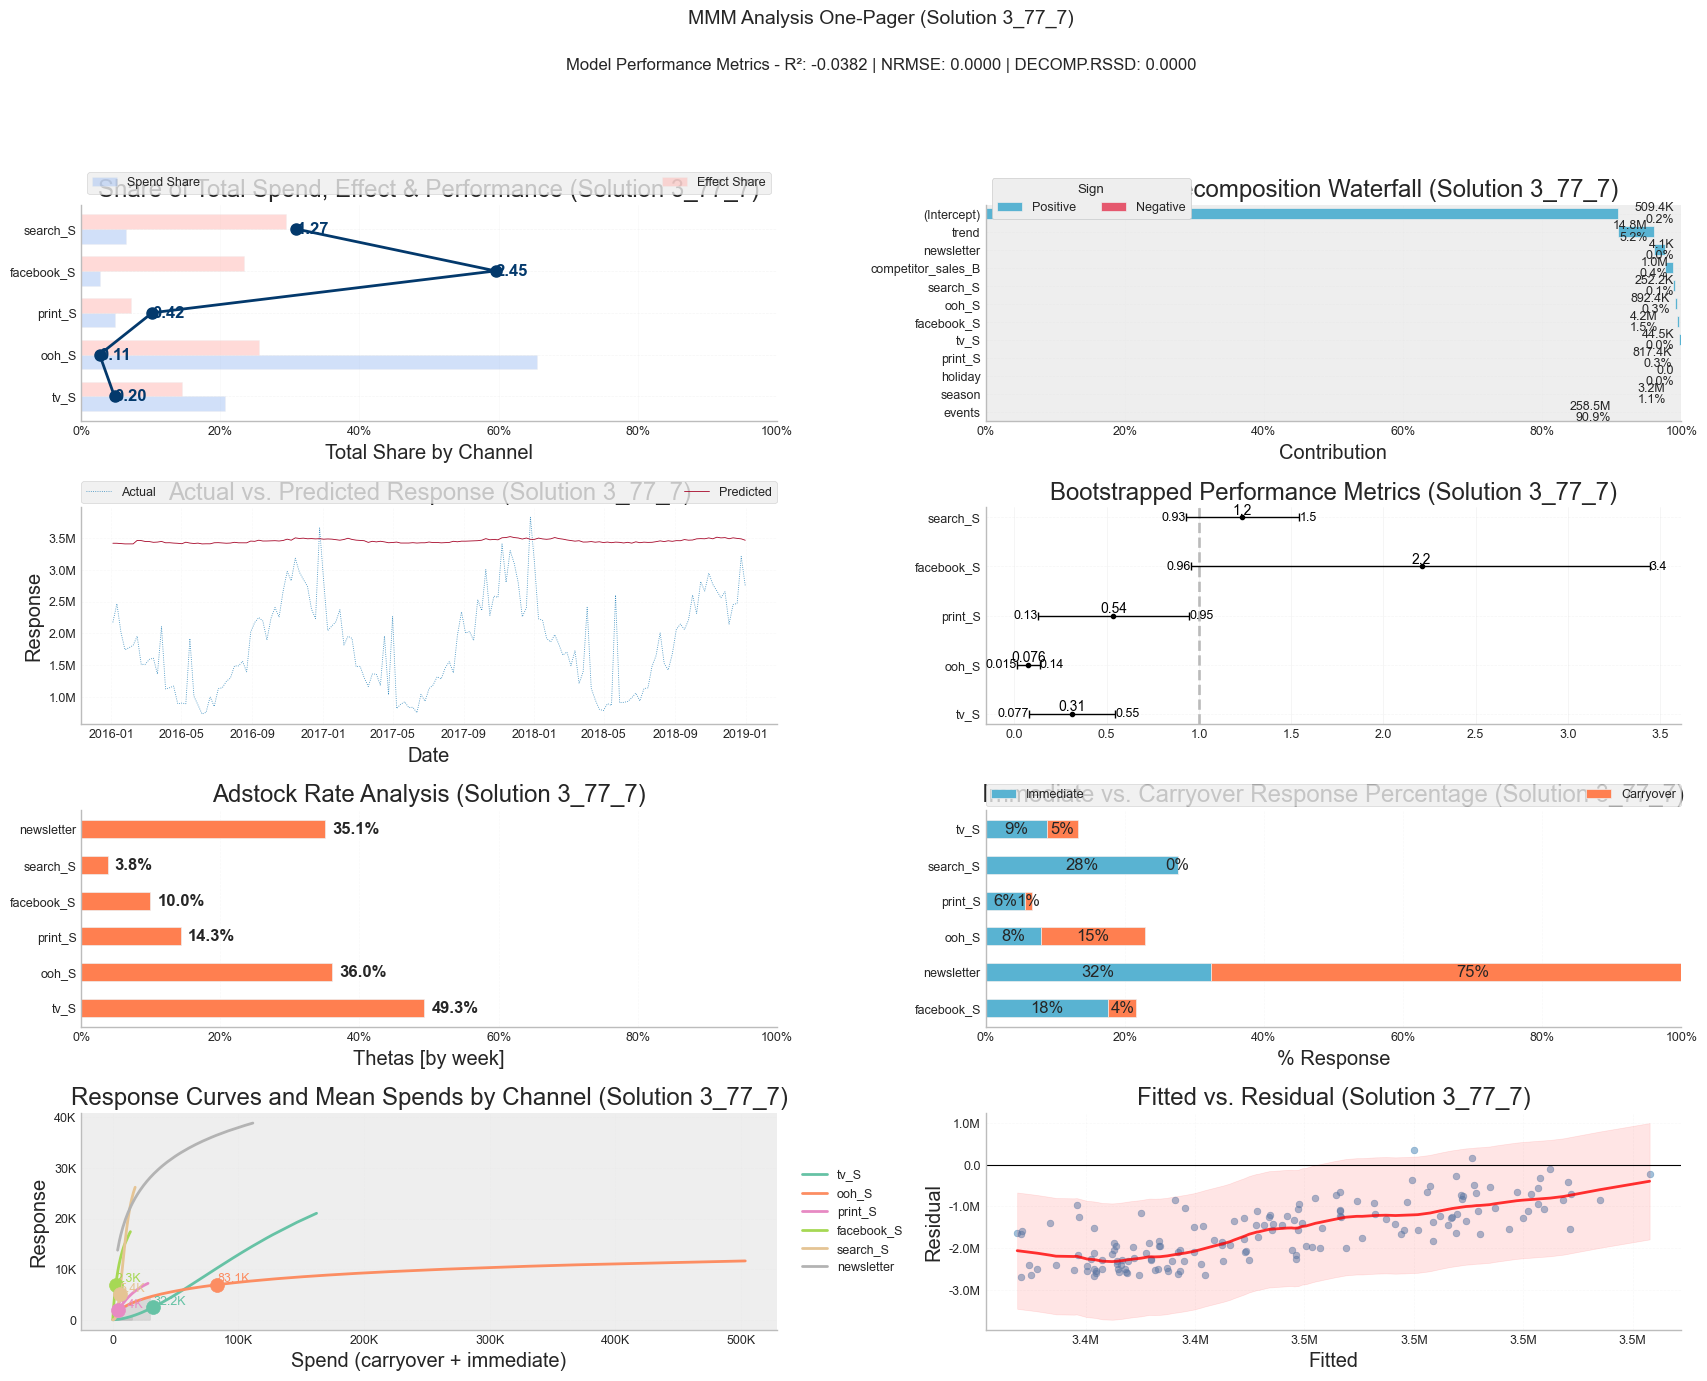

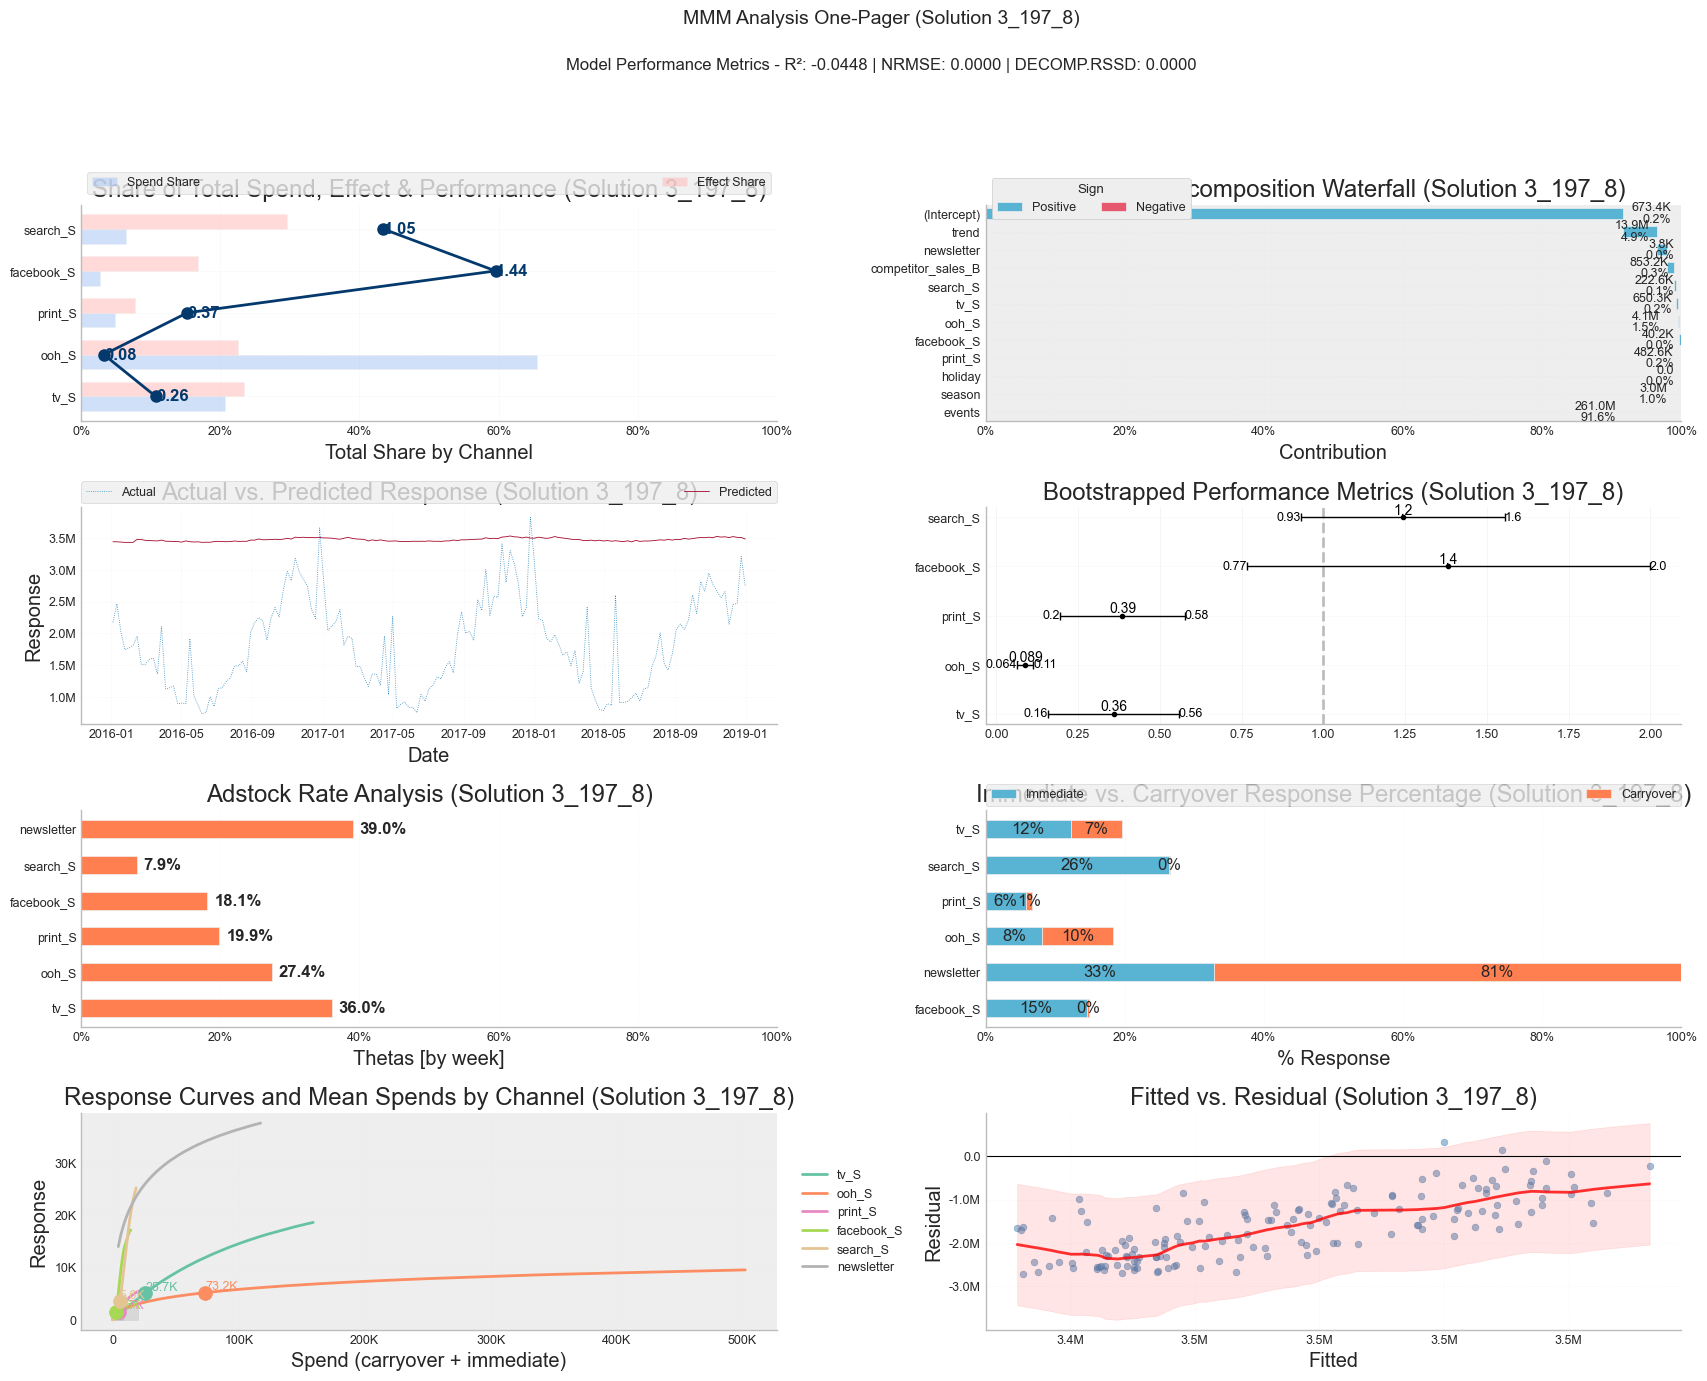

In [17]:
from robyn.data.entities.enums import AdstockType
from robyn.reporting.onepager_reporting import OnePager

visualizer = OnePager(
    pareto_result=filtered_pareto_results,
    clustered_result=cluster_results,
    adstock=AdstockType.GEOMETRIC,
    mmm_data=mmm_data,
    holidays_data=holidays_data,
)
visualizer.generate_one_pager(top_pareto=True)

# Allocator